***
***
***

<br><h2>Assignment 2 | Data Analysis & Code</h2>
<h4>DAT-5303 | Machine Learning</h4>
Maya Anne - Master of Science in Business Analytics<br>
Hult International Business School<br><br><br>

***
***
***

<h3>Part I: Introduction to the case & data preparation</h3><br>

Apprentice Chef, Inc. is an ingredient and recipe meal kit service that recently launched a cross-selling promotion service <em>Halway There</em>. The analytics department at Apprentice Chef, Inc. has been tasked with analyzing a given dataset with Apprentice Chef's current customers to predict if future customers will subscribe (or not) to the promotion. 

***

In [1]:
########################################
# importing packages
########################################

#Import necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gender_guesser.detector as gender
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz  
from IPython.display import Image 
import pydotplus 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 

########################################
# loading data and setting display options
########################################

#Read the excel file and put it into a dataframe 
file = 'Apprentice_Chef_Dataset.xlsx'
original_df = pd.read_excel(file)

#Inspect our dataset
print(original_df.head())
print(original_df.shape)
print(original_df.info())
print(original_df.describe())

/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


   REVENUE  CROSS_SELL_SUCCESS                              NAME  \
0   1880.0                   1                      Addam Osgrey   
1   1495.0                   1                   Aegon Blackfyre   
2   2572.5                   1         Aegon Frey (son of Aenys)   
3   1647.0                   1  Aegon Targaryen (son of Rhaegar)   
4   1923.0                   1                 Aegon V Targaryen   

                                      EMAIL FIRST_NAME  FAMILY_NAME  \
0                 addam.osgrey@passport.com      Addam       Osgrey   
1                   aegon.blackfyre@jnj.com      Aegon    Blackfyre   
2       aegon.frey.(son.of.aenys)@gmail.com      Aegon        Frey    
3  aegon.targaryen.(son.of.rhaegar)@ibm.com      Aegon   Targaryen    
4         aegon.v.targaryen@goldmansacs.com      Aegon  V Targaryen   

   TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  \
0                  118                   4                            7   
1             

***

<br>
<strong>Dataset Dictionary</strong><br>
We will be referring to this dictionary throughout the code to explain our variables and understand models output.

***

In [2]:
pd.read_excel('Apprentice_Chef_Data_Dictionary.xlsx')

,Column,Data Type,Description
0,REVENUE,Float,Total revenue generated from the customer
1,CROSS_SELL_SUCCESS,Integer,Success of promoting Halfway There
2,NAME,string,Full name of customer
3,EMAIL,string,Email of customer
4,FIRST_NAME,string,First name
5,FAMILY_NAME,string,Last name
6,TOTAL_MEALS_ORDERED,Integer,The total amount of meals orderd by the custom...
7,UNIQUE_MEALS_PURCH,Integer,Number of uniqe meal sets ordered by the customer
8,CONTACTS_W_CUSTOMER_SERVICE,Integer,Number of times customer was in contact with c...
9,PRODUCT_CATEGORIES_VIEWED,Integer,Total number of meal categories viewed


***

<br>
<strong>User-Defined Functions</strong><br>
Run the following code to load the user-defined functions used throughout this Notebook.

***

In [3]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800, export = False):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    export     : bool, defalut False
        whether or not to export the tree as a .png file
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width,
                unconfined = True)


    return img

########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()
    
    
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Feature_Importance.png')

***

<br>
<strong>Handling for missing values</strong><br>
The only missing values in this dataset were found for the FAMILY_NAME variable. They will later be replaces with unknown since names are discrete variables in this situation and would not help us to predict the success of our cross-selling promotion.

***

In [4]:
########################
# Missing Values Treatment
########################

#Treatment of missing values and outliers 
original_df.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
MOBILE_LOGINS                    0
PC_LOGINS                        0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

In [5]:
#Creating an imputation value
fill = 'Unknown'


#Imputing 'Mas Vnr Area'
original_df['FAMILY_NAME'] = original_df['FAMILY_NAME'].fillna(fill)  


***

<br>
<strong>Splitting and categorizing emails</strong><br>
In this situation, emails are categorical variables since they are classified by email domain. In the document case given by the data science team, emails domain can be classified between 3 main groups: professional, personal, and junk. We will create a new column SERIOUNESS_LEVEL in order to assess the commitment of each customer based on the category they use for email domain. The goal of creating this new column is to see of the email domain used by customers allow us to predict if they are more likely to use the cross-selling promotion.

***

In [6]:
#Step 1: Splitting emails

#Placeholder list
placeholder_lst = []

#Looping over each email address
for index, col in original_df.iterrows():
    
    #Splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    #Appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

#Converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


#Displaying the results
email_df

,0,1
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


In [7]:
#Step 2: Concatenating with original DataFrame

#Safety measure in case of multiple concatenations
original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')


#Renaming column to concatenate
email_df.columns = ['0' , 'EMAIL_DOMAIN']


#Concatenating personal_email_domain with friends DataFrame
original_df = pd.concat([original_df, email_df['EMAIL_DOMAIN']],
                     axis = 1)


#Printing value counts of personal_email_domain
original_df.loc[: ,'EMAIL_DOMAIN'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
merck.com            28
jnj.com              28
mcdonalds.com        28
cocacola.com         28
apple.com            27
nike.com             27
ibm.com              26
ge.org               26
dupont.com           26
chevron.com          25
microsoft.com        25
travelers.com        24
exxon.com            24
unitedhealth.com     24
boeing.com           23
pg.com               22
caterpillar.com      22
verizon.com          22
mmm.com              22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
cisco.com            18
goldmansacs.com      18
unitedtech.com       18
intel.com            17
homedepot.com        17
Name: EMAIL_DOMAIN, dtype: int64

In [8]:
#Email domain types
professional_email_domains = ['@mmm.com','@amex.com','@apple.com','@boeing.com','@caterpillar.com','@chevron.com',
                              '@cisco.com','@cocacola.com','@disney.com','@dupont.com','@exxon.com','@ge.org',
                              '@goldmansacs.com','@homedepot.com','@ibm.com','@intel.com','@jnj.com','@jpmorgan.com',
                              '@mcdonalds.com','@merck.com','@microsoft.com','@nike.com','@pfizer.com','@pg.com',
                              '@travelers.com','@unitedtech.com','@unitedhealth.com','@verizon.com','@visa.com','@walmart.com']
personal_email_domains  = ['@gmail.com','@yahoo.com','@protonmail.com']
junk_email_domains  = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']

#Placeholder list
placeholder_lst = []


#Looping to group observations by domain type
for domain in original_df['EMAIL_DOMAIN']:
    
    if '@' + domain in professional_email_domains:
        placeholder_lst.append('professional')
        
    elif '@' + domain in personal_email_domains:
        placeholder_lst.append('personal')    

    elif '@' + domain in junk_email_domains:
        placeholder_lst.append('junk')


    else:
            print('Unknown')


#Concatenating with original DataFrame
original_df['DOMAIN_GROUP'] = pd.Series(placeholder_lst)


#Checking results
original_df['DOMAIN_GROUP'].value_counts()

personal        861
professional    696
junk            389
Name: DOMAIN_GROUP, dtype: int64

In [9]:
#Creating a column that consider the seriousness of customers based on their email domain

seriousity_level_lst = []

for domains in original_df['DOMAIN_GROUP']: 
    if domains == 'professional':
        seriousity_level_lst.append(2)
        
    elif domains == 'personal':
        seriousity_level_lst.append(1) 

    elif domains == 'junk':
        seriousity_level_lst.append(0)

#Concatenating with original DataFrame
original_df['SERIOUSNESS_LEVEL'] = pd.Series(seriousity_level_lst)

#Printing our new column
original_df['SERIOUSNESS_LEVEL']

0       0
1       2
2       1
3       2
4       2
       ..
1941    1
1942    1
1943    1
1944    1
1945    0
Name: SERIOUSNESS_LEVEL, Length: 1946, dtype: int64

***
<br>
<strong>Dropping & encoding variables</strong><br>
As mentioned before, we will drop the variables that are not useful for us to predict the success of the cross-selling promotion. However, we will encode the email domain group since they are categorical variables that might help us to understand consumer behavior.

***

In [10]:
#One_hot encoding categorical variables
ONE_HOT_DOMAIN_GROUP           = pd.get_dummies(original_df['DOMAIN_GROUP'])

#Dropping categorical variables after they've been encoded
original_df = original_df.drop('EMAIL_DOMAIN', axis = 1)
original_df = original_df.drop('DOMAIN_GROUP', axis = 1)

#Joining codings together
original_df = original_df.join([ONE_HOT_DOMAIN_GROUP]) #ONE_HOT_EMAIL_DOMAIN, 

#Dropping the descrete variables 
original_df = original_df.drop('NAME', axis = 1)
original_df = original_df.drop('FAMILY_NAME', axis = 1)
original_df = original_df.drop('EMAIL', axis = 1)
original_df = original_df.drop('FIRST_NAME', axis = 1)

***
***
***

<h3>Part II: Feature selection based on correlation and model performance</h3><br>

In this session, we will look at the Pearson correlation of each variables in order to select which variables will increase the accuracy of our prediction. Additionally, since the response variable we are trying to predict, CROSS_SELL_SUCCESS, is a binary variable, we will build a logistic regression using the Statsmodel package in Python. As a result of the Statsmodel, the variables with a p-value will be tossed to build the models later in this analysis code. 

***
***
***

In [11]:
#Generate the Pearson correlation for all variables

original_df_corr = original_df.corr().round(2)

original_df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS              1.00
FOLLOWED_RECOMMENDATIONS_PCT    0.46
SERIOUSNESS_LEVEL               0.28
professional                    0.19
CANCELLATIONS_BEFORE_NOON       0.16
MOBILE_NUMBER                   0.10
TASTES_AND_PREFERENCES          0.08
REFRIGERATED_LOCKER             0.07
MOBILE_LOGINS                   0.04
CONTACTS_W_CUSTOMER_SERVICE     0.04
MASTER_CLASSES_ATTENDED         0.04
PACKAGE_LOCKER                  0.04
personal                        0.04
MEDIAN_MEAL_RATING              0.03
AVG_PREP_VID_TIME               0.03
EARLY_DELIVERIES                0.02
LARGEST_ORDER_SIZE              0.02
LATE_DELIVERIES                 0.01
AVG_TIME_PER_SITE_VISIT         0.01
TOTAL_PHOTOS_VIEWED             0.01
TOTAL_MEALS_ORDERED             0.01
PRODUCT_CATEGORIES_VIEWED       0.00
UNIQUE_MEALS_PURCH              0.00
REVENUE                         0.00
WEEKLY_PLAN                    -0.01
AVG_CLICKS_PER_VISIT           -0.04
PC_LOGINS                      -0.05
C

In [12]:
#Declaring explanatory variables 
original_df_better = original_df[['FOLLOWED_RECOMMENDATIONS_PCT', 'SERIOUSNESS_LEVEL', 'junk', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'professional']]

#Declaring target variables 
original_df_target = original_df.loc[ : , 'CROSS_SELL_SUCCESS']

In [13]:
#Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            original_df_better,
            original_df_target,
            test_size = 0.25,
            random_state = 2501,
            stratify = original_df_target)


# merging training data for statsmodels
original_df_train = pd.concat([X_train, y_train], axis = 1)

In [14]:
#Creating a loop to generate variables for the statsmodel logistic regression
for val in original_df_better:
    print(f"{val} +")

FOLLOWED_RECOMMENDATIONS_PCT +
SERIOUSNESS_LEVEL +
junk +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
TASTES_AND_PREFERENCES +
professional +


In [15]:
#Instantiating a logistic regression model with statsmodel
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~ FOLLOWED_RECOMMENDATIONS_PCT +
                                        SERIOUSNESS_LEVEL +
                                        junk +
                                        MOBILE_NUMBER +
                                        CANCELLATIONS_BEFORE_NOON +
                                        TASTES_AND_PREFERENCES +
                                        professional""",
                           data    = original_df_train)


#Fitting the model 
results_logistic = logistic_small.fit()


#Checking the results 
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.447889
         Iterations 8


/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1452
Method:                           MLE   Df Model:                            6
Date:                Wed, 05 Feb 2020   Pseudo R-squ.:                  0.2868
Time:                        22:56:13   Log-Likelihood:                -653.47
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                2.767e-110
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.7927        nan        nan        nan         nan         nan
FOLLOWED_RECOMMENDATIONS_PCT     0.0547      0.004     14.179      0.000       0.047       0.062
SERIOUSNESS_LEVEL                0.0039        nan        nan        nan         nan         nan
junk                            -1.2649        nan        nan        nan         nan         nan
MOBILE_NUMBER                    0.5288      0.200      2.650      0.008       0.138       0.920
CANCELLATIONS_BEFORE_NOON        0.2846      0.051      5.578      0.000       0.185       0.385
TASTES_AND_PREFERENCES           0.4742      0.149      3.186      0.001       0.182       0.766
professional                     0.5316        nan        nan        nan         nan         nan
================================================================================================
"""

***
***
***

<h3>Part III: Modelling</h3><br>

The final part of this analysis code is experimental since it is dedicated to model building. All models used in this section will be briefly explained prior to using this model. The model that yields the highest score will be included in the final model file that comes with this project analysis. 

***
***
***

<strong>Hyperparameter tuning</strong><br>

Hyperparameters of a machine learning algorithm are used in order to optimize its results. <a href = "https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)">This Wikipedia page</a> explains in defining hyperparameter tuning as: <em>a parameter whose value is set before the learning process begins</em>. In other words, these are arguments that are set before a model is fit and predictions are made.

<strong>Logistic Regression</strong><br>

Logistic Regression is used to assess the probability of an event to occur. In other words, Logistic Regression can be seen as the probability of success or failure. You can read the following documentation for the logistic regression in the sklearn package:
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">LogisticRegression</a> from <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model">sklearn.linear_model</a>.

***

In [16]:
########################################
# GridSearchCV
########################################

#Declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 3.0, 0.1)
warm_start_space = [True, False]


#Creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space}


#Instantiating the model object without hyperparameters
lr_tuned = LogisticRegression(solver = 'lbfgs',
                              random_state = 222)


#GridSearchCV object
lr_tuned_cv = GridSearchCV(estimator  = lr_tuned,
                           param_grid = param_grid,
                           cv         = 3,
                           scoring    = make_scorer(roc_auc_score,
                                                    needs_threshold = False))


#Fitting to the dataset 
lr_tuned_cv.fit(original_df_better, original_df_target)


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (

Tuned Parameters  : {'C': 0.1, 'warm_start': True}
Tuned CV AUC      : 0.582


/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

In [17]:
#Used the best hyperparameters for the model

lr_tuned_cv.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=222, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

In [18]:
#Building a model based on hyperparameter tuning results

#Instantiating a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


#Predicting based on the testing set
lr_tuned_pred = lr_tuned.predict(X_test)


#Scoring the results
print('Training ACCURACY:', lr_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))

Training ACCURACY: 0.7539
Testing  ACCURACY: 0.7721
AUC Score        : 0.7256


In [19]:
#Instantiating a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 0.9,
                            random_state = 222)


#FItting the training data
logreg_fit = logreg.fit(X_train, y_train)


#Predicting based on the testing set
logreg_pred = logreg_fit.predict(X_test)


#Scoring the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))

Training ACCURACY: 0.7622
Testing  ACCURACY: 0.7762
AUC Score        : 0.7256


***

<strong>Confusion Matrix</strong><br>

The confusion matrix is necessary here to understand how many times did our model predict right and how many times it predicted wrong. <a href = "https://en.wikipedia.org/wiki/Confusion_matrix">This Wikipedia page</a> explains how confusion matrix works. As we can see after running the code below, the number of observations that were predicted to cross sell and that eventually did not cross-sell is lower in comparison to the times were the model predicted right. However, since the number of observations in this category could represent a big loss for the company since investments in pushing this promotion to customers would be based on the revenue, it might not be right for the company to use this model. 

***

[[ 89  67]
 [ 42 289]]


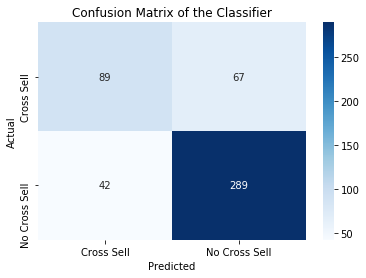

In [20]:
#Creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

#Calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Cross Sell', 'No Cross Sell'])

In [21]:
# creating an empty list
model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'AUC Value']]


# train accuracy
logreg_train_acc  = logreg_fit.score(X_train, y_train).round(4)


# test accuracy
logreg_test_acc   = logreg_fit.score(X_test, y_test).round(4)


# auc value
logreg_auc = roc_auc_score(y_true  = y_test,
                           y_score = logreg_pred).round(4)


# saving the results
model_performance.append(['Logistic Regression',
                          logreg_train_acc,
                          logreg_test_acc,
                          logreg_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7622, 0.7762, 0.7218]


***
<br>
<strong>Decision Tree Classifier</strong><br>
Decision tree builds classification or regression models in the form of a tree structure. It breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches. Leaf node represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. <a href = "https://medium.com/@chiragsehra42/decision-trees-explained-easily-28f23241248">Source</a> 

***

In [22]:
#Declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25)
leaf_space      = pd.np.arange(1, 100)


#Creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


#Instantiating the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 802)


#GridSearchCV object
tuned_tree_cv = GridSearchCV(estimator  = tuned_tree,
                             param_grid = param_grid,
                             cv         = 3,
                             scoring    = make_scorer(roc_auc_score,
                                                    needs_threshold = False))



#Fitting to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(original_df_better, original_df_target)


#Printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned CV AUC      :", tuned_tree_cv.best_score_.round(4))



/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """


Tuned Parameters  : {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'splitter': 'random'}
Tuned CV AUC      : 0.6505


In [23]:
# building a model based on hyperparameter tuning results

#Instantiating a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


#Predicting based on the testing set
tree_tuned_pred = tree_tuned.predict(X_test)


#Scoring the results
print('Training ACCURACY:', tree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))

Training ACCURACY: 0.8101
Testing  ACCURACY: 0.8337
AUC Score        : 0.7912


In [24]:
#Train accuracy
tree_train_acc = tree_tuned.score(X_train, y_train).round(4)

#Test accuracy
tree_test_acc  = tree_tuned.score(X_test, y_test).round(4)

#Auc value
tree_auc       = roc_auc_score(y_true  = y_test,
                                    y_score = tree_tuned_pred).round(4)


#Saving the results
model_performance.append(['Tuned Tree',
                          tree_train_acc,
                          tree_test_acc,
                          tree_auc])


#Checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7622, 0.7762, 0.7218]
['Tuned Tree', 0.8101, 0.8337, 0.7912]


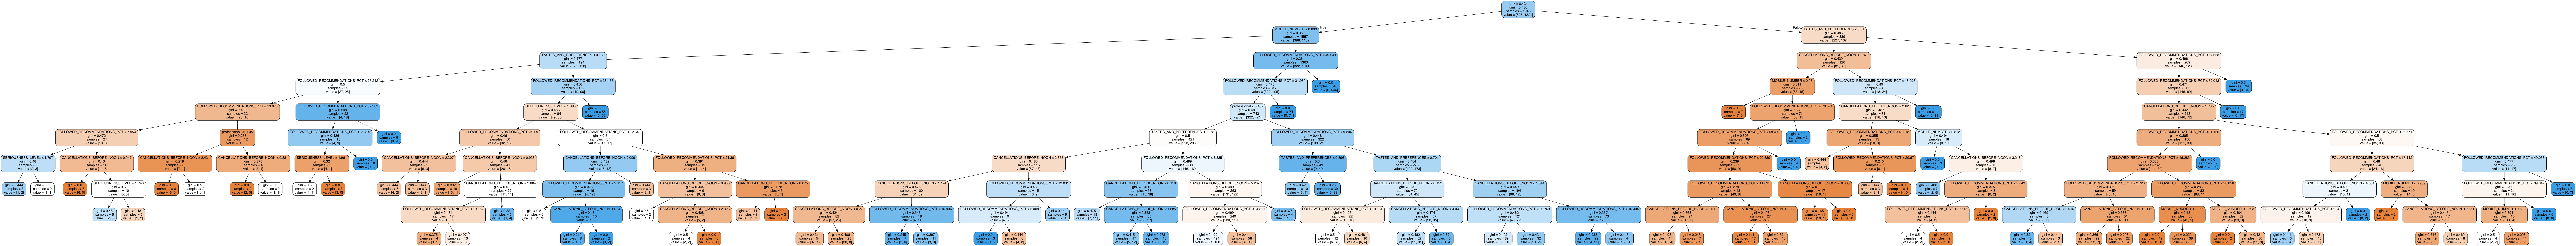

In [25]:
#Displaying the tree
display_tree(tree = tree_tuned,
             feature_df = original_df_better,
             height = 2000,
             width  = 2000)

***
<br>
<strong>Gradient Boosting Classifier</strong><br>
 Boosting is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set. Gradient boosting performs by using gradients in the loss function.  The loss function is a measure indicating how good are model’s coefficients are at fitting the underlying data.  <a href = "https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab">Please read the following link for a deeper understanding.</a> 

***

In [26]:
#Instantiating the model object without hyperparameters
gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 802)


#Fit step is needed as we are not using .best_estimator
gbm_default_fit = gbm_default.fit(X_train, y_train)


#Predicting based on the testing set
gbm_default_pred = gbm_default_fit.predict(X_test)


#Scoring the results
print('Training ACCURACY:', gbm_default_fit.score(X_train, y_train).round(4))
print('Testing ACCURACY :', gbm_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_default_pred).round(4))

Training ACCURACY: 0.8122
Testing ACCURACY : 0.807
AUC Score        : 0.7784


In [27]:
#Declaring model performance objects
gbm_train_acc = gbm_default_fit.score(X_train, y_train).round(4)
gbm_test_acc  = gbm_default_fit.score(X_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_default_pred).round(4)


#Appending to model_performance
model_performance.append(['GBM',
                          gbm_train_acc,
                          gbm_test_acc,
                          gbm_auc])


#Checking the results
model_performance

[['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value'],
 ['Logistic Regression', 0.7622, 0.7762, 0.7218],
 ['Tuned Tree', 0.8101, 0.8337, 0.7912],
 ['GBM', 0.8122, 0.807, 0.7784]]

In [28]:
#Declaring a hyperparameter space
learn_space     = pd.np.arange(0.1, 1.6, 0.3)
estimator_space = pd.np.arange(50, 250, 50)
depth_space     = pd.np.arange(1, 10)


#Creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space}


#Instantiating the model object without hyperparameters
gbm_grid = GradientBoostingClassifier(random_state = 802)


#GridSearchCV object
gbm_cv = GridSearchCV(estimator       = gbm_grid,
                           param_grid = param_grid,
                           cv         = 3,
                           scoring    = make_scorer(roc_auc_score,
                                        needs_threshold = False))


#Fitting to the data (due to cross-validation)
gbm_cv.fit(original_df_better, original_df_target)


#Predict step is not needed


#Printing the optimal parameters and best score
print("Tuned Parameters  :", gbm_cv.best_params_)
print("Tuned Training AUC:", gbm_cv.best_score_.round(4))

/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


Tuned Parameters  : {'learning_rate': 0.4, 'max_depth': 1, 'n_estimators': 100}
Tuned Training AUC: 0.6275


In [29]:
#Instantiating the model object without hyperparameters
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.7,
                                       max_depth     = 1,
                                       n_estimators  = 150,
                                       random_state  = 222)


#Fit step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(X_train, y_train)


#Predicting based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(X_test)


#Scoring the results
print('Training ACCURACY:', gbm_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.7978
Testing  ACCURACY: 0.8111
AUC Score        : 0.7865


In [30]:
#Declaring model performance objects
gbm_tuned_train_acc = gbm_tuned_fit.score(X_train, y_train).round(4)
gbm_tuned_test_acc  = gbm_tuned_fit.score(X_test, y_test).round(4)
gbm_tuned_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


#Appending to model_performance
model_performance.append(['Tuned GBM',
                          gbm_tuned_train_acc,
                          gbm_tuned_test_acc,
                          gbm_tuned_auc])


#Checking the results
model_performance

[['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value'],
 ['Logistic Regression', 0.7622, 0.7762, 0.7218],
 ['Tuned Tree', 0.8101, 0.8337, 0.7912],
 ['GBM', 0.8122, 0.807, 0.7784],
 ['Tuned GBM', 0.7978, 0.8111, 0.7865]]

***
<br>
<strong>Random Forest Classifier</strong><br>
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is:
A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.  <a href = "https://towardsdatascience.com/understanding-random-forest-58381e0602d2">Source.</a> 

***

In [31]:
#Instantiating a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 10,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 222)

In [32]:
#Fitting the training data
rf_default_fit = rf_default.fit(X_train, y_train)


#Predicting based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_test)


#Scoring the results
print('Training ACCURACY:', rf_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8355
Testing  ACCURACY: 0.7926
AUC Score        : 0.7559


/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


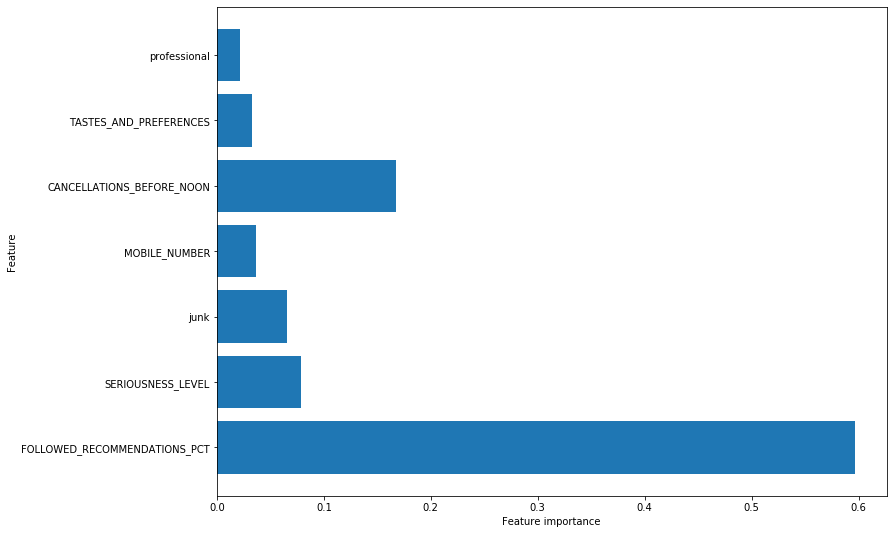

In [33]:
#Plot the feature importances
plot_feature_importances(rf_default_fit,
                         train = X_train,
                         export = False)

In [34]:
#Declaring model performance objects
rf_train_acc = rf_default_fit.score(X_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(X_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


#Appending to model_performance
model_performance.append(['Random Forest',
                          rf_train_acc,
                          rf_test_acc,
                          rf_auc])


#Checking the results
model_performance

[['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value'],
 ['Logistic Regression', 0.7622, 0.7762, 0.7218],
 ['Tuned Tree', 0.8101, 0.8337, 0.7912],
 ['GBM', 0.8122, 0.807, 0.7784],
 ['Tuned GBM', 0.7978, 0.8111, 0.7865],
 ['Random Forest', 0.8355, 0.7926, 0.7559]]

In [35]:
#Declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


#Creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


#Instantiating the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 802)


#GridSearchCV object
forest_cv = GridSearchCV(estimator  = forest_grid,
                              param_grid = param_grid,
                              cv         = 3,
                              scoring    = make_scorer(roc_auc_score,
                                           needs_threshold = False))


#Fitting to the FULL DATASET (due to cross-validation)
forest_cv.fit(original_df_better, original_df_target)


#Printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/Users/mayaanne/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


Tuned Parameters  : {'bootstrap': False, 'criterion': 'entropy', 'min_samples_leaf': 21, 'n_estimators': 100, 'warm_start': True}
Tuned Training AUC: 0.6083


In [36]:
#Instantiating the model object without hyperparameters
rf_tuned = RandomForestClassifier(bootstrap        = False,
                                  criterion        = 'entropy',
                                  min_samples_leaf = 1,
                                  n_estimators     = 350,
                                  warm_start       = True,
                                  random_state     = 222)


#Fit step is needed as we are not using .best_estimator
rf_tuned_fit = rf_tuned.fit(X_train, y_train)


#Predicting based on the testing set
rf_tuned_pred = rf_tuned_fit.predict(X_test)


#Scoring the results
print('Training ACCURACY:', rf_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_tuned_pred).round(4))

Training ACCURACY: 0.8396
Testing  ACCURACY: 0.8152
AUC Score        : 0.798


In [37]:
#Declaring model performance objects
rf_tuned_train_acc = rf_tuned_fit.score(X_train, y_train).round(4)
rf_tuned_test_acc  = rf_tuned_fit.score(X_test, y_test).round(4)
rf_tuned_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_tuned_pred).round(4)


#Appending to model_performance
model_performance.append(['Tuned Random Forest',
                          rf_tuned_train_acc,
                          rf_tuned_test_acc,
                          rf_tuned_auc])


#Checking the results
model_performance

[['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value'],
 ['Logistic Regression', 0.7622, 0.7762, 0.7218],
 ['Tuned Tree', 0.8101, 0.8337, 0.7912],
 ['GBM', 0.8122, 0.807, 0.7784],
 ['Tuned GBM', 0.7978, 0.8111, 0.7865],
 ['Random Forest', 0.8355, 0.7926, 0.7559],
 ['Tuned Random Forest', 0.8396, 0.8152, 0.798]]

In [38]:
model_performance = pd.DataFrame(model_performance)
model_performance

,0,1,2,3
0,Model,Training Accuracy,Testing Accuracy,AUC Value
1,Logistic Regression,0.7622,0.7762,0.7218
2,Tuned Tree,0.8101,0.8337,0.7912
3,GBM,0.8122,0.807,0.7784
4,Tuned GBM,0.7978,0.8111,0.7865
5,Random Forest,0.8355,0.7926,0.7559
6,Tuned Random Forest,0.8396,0.8152,0.798


In [39]:
#Saving the DataFrame to Excel
model_performance.to_excel('Classification Model Performance.xlsx',
                           index = False)

***
***
***

<h3>Part III: Best model & Conclusion</h3><br>

As for the best model, we consider the Random Forest Classification as our final model since the training score, testing score, and auc score is the best and are relatively close to each other. In other word, our model predicted with a high enough accuracy and consistency throughout all of our data, which suggests that it will predict with the same accuracy on the future data that will be fed into our model. Therefore we can confidently say that we will be able to predict if customers will convert to the cross-selling promotion or not and make informed investment choices that will provide great returns. Please see the insights and recommendation file attached with this analysis project for further interpretation of the model.

***
***
***